## Boosting

**`Boosting`** es una clase de algoritmos de aprendizaje automático de **"conjunto"** que implica combinar las predicciones de muchos **"aprendices débiles"**. En esta clase de algoritmos los modelos se agregan secuencialmente y los modelos posteriores en la secuencia corrigen las predicciones realizadas por los modelos anteriores en la secuencia.

Un **"aprendiz débil"** es un modelo que es muy simple pero que puede dar buenos resultados.

## Gradient Boosting 

**Gradient Boosting** es un potente algoritmo de aprendizaje automático de **"conjunto"** que utiliza árboles de decisión.

**Bootstrap** es una técnica de conjunto general que consiste en agregar secuencialmente modelos al conjunto donde los modelos posteriores corrigen el rendimiento de los modelos anteriores. **Adaptive Boosting** fue el primer algoritmo que hizo uso de **Bootstrap**.

El **`Gradient Boosting`** es una generalización de **`Adaptive Boosting`**, que mejora el rendimiento del enfoque e introduce ideas de la agregación de **`Bootstrap`** para mejorar aún más los modelos, como el muestreo aleatorio de las muestras y las características al entranar los miembros del conjunto.

**Gradient Boosting** también se conoce como **Gradient Tree Boosting** o como **Gradient Boosting Machines** (**GBM**)

Los conjuntos se construyen a partir de modelos de árboles de decisión. Los árboles se agregan uno a la vez al conjunto y se ajustan para corregir los errores de predicción cometidos por modelos anteriores. 

Los modelos se ajustan utilizando cualquier función de pérdida diferenciable arbitraria y el algoritmo de optimización de **Gradiente Descendente** (**`Gradient Descent`**). El uso de **Gradiente Descendente** es lo que le da el nombre a este algoritmo, ya que el gradiente de pérdida se minimiza a medida que se ajusta el modelo, como una red neuronal.

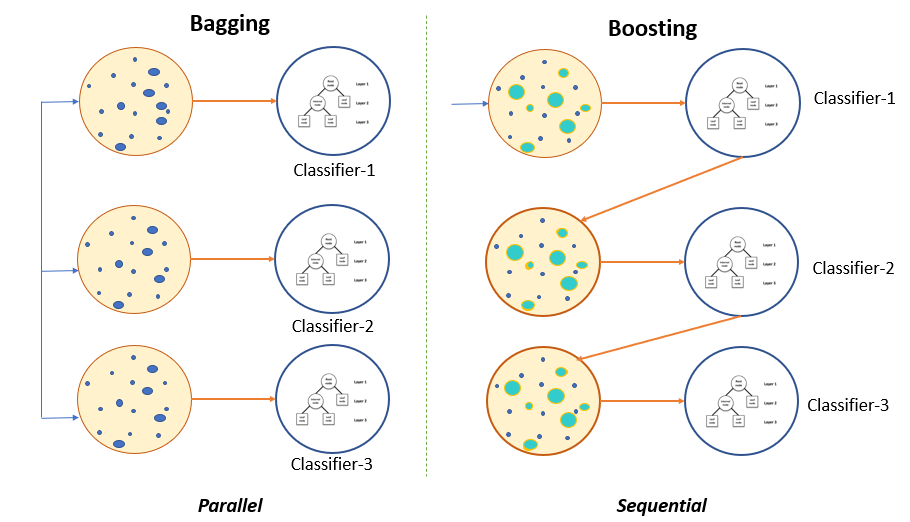

_**Documentacion:** https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

# Normalizacion
from sklearn.preprocessing import MinMaxScaler

# GridSearchCV
from sklearn.model_selection import GridSearchCV

# Train, Test
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

### Procesamiento

In [3]:
# Normalización de datos

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

X

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

### Train, Test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (105, 4), y_train: (105,)
X_test: (45, 4),  y_test: (45,)


### Modelo

In [5]:
from sklearn.ensemble import GradientBoostingClassifier

In [6]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Siempre usa DecisionTreeRegressor()

GradientBoostingClassifier()

### Predicciones

In [7]:
yhat = model.predict(X_test)

yhat

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [8]:
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 1.0
Accuracy: 1.0
Precisión: 1.0
Sensibilidad: 1.0
F1-score: 1.0


### Confusion Matrix

In [9]:
confusion_matrix(y_test, yhat, labels = [0, 1, 2])

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

### Atributos y Métodos

In [10]:
# .feature_importances_

model.feature_importances_

array([0.00541321, 0.0187785 , 0.50352947, 0.47227883])

In [11]:
# .predict_proba()

np.round(model.predict_proba(X_test), 3)

# Redondeado a 3 decimales para quitar la notación científica

array([[0.   , 1.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.999, 0.001],
       [0.   , 1.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 0.001, 0.999],
       [0.   , 0.997, 0.003],
       [0.   , 1.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.002, 0.998],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [1.

In [12]:
# .estimators_ retorna los modelos que usa GradientBoostingClassifier()

model.estimators_

array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x24384A20740),
        DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x24384A20740),
        DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x24384A20740)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x24384A20740),
        DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x24384A20740),
        DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x24384A20740)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x2438

In [13]:
# .staged_predict() es un generador que contiene las predicciones de cada instancia para cada momento del modelo

for x in model.staged_predict(X_test):
    print(x)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0

In [14]:
# .staged_predict_proba() es un generador que contiene las probabilidades de cada instancia para cada momento del modelo

for x in model.staged_predict_proba(X_test):
    print(x)

[[0.26626493 0.41857651 0.31515857]
 [0.36787818 0.31606091 0.31606091]
 [0.26533405 0.31405676 0.42060919]
 [0.26626493 0.41857651 0.31515857]
 [0.26626493 0.41857651 0.31515857]
 [0.36787818 0.31606091 0.31606091]
 [0.26626493 0.41857651 0.31515857]
 [0.26533405 0.31405676 0.42060919]
 [0.26626493 0.41857651 0.31515857]
 [0.26626493 0.41857651 0.31515857]
 [0.26533405 0.31405676 0.42060919]
 [0.36787818 0.31606091 0.31606091]
 [0.36787818 0.31606091 0.31606091]
 [0.36787818 0.31606091 0.31606091]
 [0.36787818 0.31606091 0.31606091]
 [0.26626493 0.41857651 0.31515857]
 [0.26533405 0.31405676 0.42060919]
 [0.26626493 0.41857651 0.31515857]
 [0.26626493 0.41857651 0.31515857]
 [0.26533405 0.31405676 0.42060919]
 [0.36787818 0.31606091 0.31606091]
 [0.26533405 0.31405676 0.42060919]
 [0.36787818 0.31606091 0.31606091]
 [0.26533405 0.31405676 0.42060919]
 [0.26533405 0.31405676 0.42060919]
 [0.26533405 0.31405676 0.42060919]
 [0.26533405 0.31405676 0.42060919]
 [0.26533405 0.31405676 0.42

### Parámetros del Modelo (Tunning)

#### Parametros de GradientBoostingClassifier()

- **`loss`**: {"deviance", "exponencial"}, **default** = "deviance"
    - La función de pérdida a optimizar. "deviance" se refiere a la desviación (regresión logística) para la clasificación con resultados probabilísticos. "exponencial" utiliza el algoritmo de Adaptive Boosting (AdaBoost).

___

- **`learning_rate`**: float, **default** = 0.1
    - La "velocidad" o el "paso" con la que el modelo "aprende".
    
___

- **`n_estimators`**: int, **default** = 100
    - Numero de etapas de boosting. Debido a la naturaleza del algoritmo, es muy difícil que caiga en overfitting.
        
___

- **`subsample`**: float, **default** = 1.0
    - La fracción de muestras que se usará para ajustar los modelos bases. Depende del número de instancias. Usar un número menor a 1 conduce a una reducción de la varianza y un aumento del sesgo.
        
___

- **`criterion`**: {"friedman_mse", "squared_error", "mse", "mae"}, **`default`** = "friedman_mse"
    - La función para medir la calidad de una división. 
    - "friedman_mse" para el error cuadrático medio con puntuación de mejora de Friedman
    - "squared_error" para el error cuadrático medio, también se puede usar "mse"
    - "mae" para el error absoluto medio. (Deprecated)
    - El valor predeterminado de 'friedman_mse' es generalmente el mejor, ya que puede proporcionar una mejor aproximación en algunos casos.
        
___

- **`min_samples_split`**: int or float, **default** = 2
    - El número mínimo de muestras requeridas para dividir un nodo interno.
    - Si es int, considera **`min_samples_split`** como el número mínimo.
    - Si es float, entonces **`min_samples_split`** es una fracción y **`ceil(min_samples_split * n_samples)`** es el número mínimo de muestras para cada división/split.
    
___


- **`min_samples_leaf`**: int or float, **`default`** = 1
    - El número mínimo de muestras requeridas para llegar a nodo hoja. Es un punto de división a cualquier profundidad del arbol  solo se considerará si deja al menos **`min_samples_leaf`** muestras de entrenamiento en cada una de las ramas izquierda y derecha.
    - Si es int, considera **`min_samples_leaf`** como el número mínimo.
    - Si es float, entonces **`min_samples_split`** es una fracción y **`ceil(min_samples_leaf * n_samples)`** es el número mínimo de muestras para cada nodo.

___

- **`min_weight_fraction_leaf`**: float, **`default`** = 0.0
    - La fracción ponderada mínima de la suma total de pesos (de todas las muestras de entrada) requerida para estar en un nodo hoja. Las muestras tienen el mismo peso cuando no se proporciona **`sample_weight`**.
    
___


- **`max_depth`**: int, **default** = None
    - La profundidad máxima del árbol. Si es **None** los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos de **`min_samples_split`** elementos.
    
___

- **`min_impurity_decrease`**: float, **`default`** = 0.0
    - Un nodo se dividirá si esta división induce una disminución de la impureza mayor o igual a este valor.
    
___


- **`max_features`**: int, float or {"auto", "sqrt", "log2"}, **`default`** = None

    - El número de características (atributos) a considerar al buscar la mejor división:
    - Si es int, considera las funciones **`max_features`** en cada división.
    - Si es float, **`max_features`** es una fracción y se consideran **`int(max_features * n_features)`** características (atributos) en cada división.
    - Si es "auto", entonces **`max_features = sqrt(n_features)`**.
    - Si es "sqrt", entonces **`max_features = sqrt(n_features)`**.
    - Si es "log2", entonces **`max_features = log2(n_features)`**.
    - Si None, entonces **`max_features = n_features`**.
  
____


- **`max_leaf_nodes`**: int, **`default`** = None
    - Este parámetro hace "crecer" el árbol ya que aumenta el número de nodos hoja.
    - Se define como "mejor nodo" como una reducción relativa de la impureza.
    - Si es None, entonces el modelo tendrá un número ilimitado de nodos hoja.
    
___


- **`random_state`**: int, **`default`** = None
    - Controla la aleatoriedad del estimador. Las características (atributos) siempre se permutan aleatoriamente en cada división, incluso si el divisor está configurado como "best".
    - Cuando **`max_features < n_features`**, el algoritmo seleccionará **`max_features`** al azar en cada división antes de encontrar la mejor división entre ellas. Pero la división mejor encontrada puede variar entre diferentes ejecuciones, incluso si **`max_features = n_features`**.
    - Ese es el caso, si la mejora del criterio es idéntica para varias divisiones y una división debe seleccionarse al azar.
    - Para obtener un comportamiento determinista durante el ajuste, **`random_state`** debe fijarse en un número entero.

___

- **`validation_fraction`**: float, **`default`** = 0.1
    - La proporción de datos de entrenamiento que se apartarán como conjunto de validación para **"early stopping"**.
    - Debe estar entre 0 y 1.
    - Solo se usa si **`n_iter_no_change`** es un número entero.
    
___

- **`n_iter_no_change`**: int, **`default`** = None
    - Se usa para decidir si se usará **"early stopping"** para finalizar el entrenamiento cuando la puntuación de validación no mejora.
    - Por defecto se usa None para deshabilitar el **"early stopping"**.
    - Si se establece en un número, reservará una proporcion de datos de entrenamiento como validación del tamaño de **`validation_fraction`** y finalizará el entrenamiento cuando la puntuación de validación no mejore en todos los números de iteraciones **`n_iter_no_change`** anteriores.
    - La división es estratificada.
    
___

- **`tol`**: float, **`default`** = 1/10**4
    - Tolerancia para **"early stopping"**.
    - Cuando la función de perdida no mejora al menos en **`tol`** para un número de iteraciones igual a **`n_iter_no_change`** (si se establece en un número), el entrenamiento se detiene.

### Ejemplo de GradientBoostingClassifier() con parametros (clasificación binaria)

In [15]:
titanic = pd.read_csv("../Data/titanic_preprocesamiento.csv")

X = titanic.drop(["Survived", "Fare-Binning", "Age-Binning"], axis = 1)
y = titanic["Survived"]

column_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (621, 11), y_train: (621,)
X_test: (267, 11),  y_test: (267,)


In [113]:
model = GradientBoostingClassifier(n_estimators        = 500,
                                   learning_rate       = 0.05,
                                   max_depth           = 3,
                                   subsample           = 0.5,
                                   validation_fraction = 0.1,
                                   n_iter_no_change    = 200,
                                   max_features        = "log2",
                                   random_state        = 42,
                                   tol                 = 0.001,
                                   verbose             = 1)
model.fit(X_train, y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3227           0.0392            1.00s
         2           1.2448           0.0285            1.00s
         3           1.1946           0.0305            0.83s
         4           1.1535           0.0265            0.75s
         5           1.1749           0.0158            0.70s
         6           1.1248           0.0215            0.66s
         7           1.1105           0.0184            0.64s
         8           1.1101           0.0176            0.55s
         9           1.0856           0.0146            0.55s
        10           1.0731           0.0116            0.54s
        20           0.9643           0.0043            0.38s
        30           0.8298           0.0016            0.36s
        40           0.8515           0.0028            0.34s
        50           0.8172           0.0025            0.32s
        60           0.7905           0.0008            0.31s
       

GradientBoostingClassifier(learning_rate=0.05, max_features='log2',
                           n_estimators=500, n_iter_no_change=200,
                           random_state=42, subsample=0.5, tol=0.001,
                           verbose=1)

In [114]:
len(model.estimators_)

267

In [115]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"AUC Train: {roc_auc_score(y_train, y_train_pred)}\nAUC Test: {roc_auc_score(y_test, y_test_pred)}")

AUC Train: 0.8643404839996452
AUC Test: 0.8425525700934579


### Rendimiento del modelo

In [116]:
y_train_pred_trees = np.stack(list(model.staged_predict_proba(X_train)))[:, :, 1]
y_test_pred_trees = np.stack(list(model.staged_predict_proba(X_test)))[:, :, 1]

y_train_pred_trees.shape, y_test_pred_trees.shape

((267, 621), (267, 267))

In [117]:
auc_train_trees = [roc_auc_score(y_train, y_pred) for y_pred in y_train_pred_trees]
auc_test_trees = [roc_auc_score(y_test, y_pred) for y_pred in y_test_pred_trees]

In [118]:
results = pd.DataFrame()
results['train'] = auc_train_trees
results['test'] = auc_test_trees
results['diff'] = results.train - results.test
results = results.sort_values('diff', ascending=True)
results[results['diff'] > 0]

,train,test,diff
50,0.880496,0.880169,0.000327
51,0.880784,0.880286,0.000498
49,0.881166,0.880520,0.000646
52,0.881128,0.879994,0.001133
58,0.882285,0.880841,0.001444
...,...,...,...
260,0.939627,0.890362,0.049265
266,0.940204,0.889836,0.050367
265,0.940004,0.889369,0.050635
263,0.939949,0.889194,0.050755


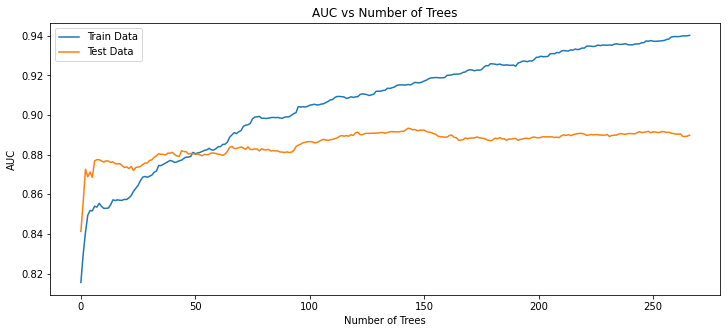

In [99]:
plt.figure(figsize = (12, 5))

plt.plot(auc_train_trees, label = "Train Data")
plt.plot(auc_test_trees, label = "Test Data")

plt.title("AUC vs Number of Trees")
plt.ylabel("AUC")
plt.xlabel("Number of Trees")
plt.legend()

plt.show()

### Feature Importance

In [100]:
df_feature = pd.DataFrame()

df_feature["Columna"] = column_names
df_feature["Importancia"] = model.feature_importances_

df_feature.sort_values("Importancia", ascending = False)

,Columna,Importancia
2,Fare,0.253513
0,Age,0.203006
4,male,0.127465
1,Pclass,0.112034
8,Mr.,0.101752
3,female,0.080943
9,Mrs.,0.034773
5,Familia,0.024398
10,Other,0.021232
7,Miss.,0.020654


In [ ]:
################################################################################################################################